In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns 

In [129]:
HCI = pd.read_csv("Hackathon_Categories_Information.csv")
HD = pd.read_csv("Hackathon_Data.csv")
HPD = pd.read_excel("Hackathon_Panelists_Demographics.xlsx")

In [130]:
print (HCI.head)
print(HCI.shape)
HCI.columns

<bound method NDFrame.head of                Category  Calories/100g  Price per Volume
0           Baby Cereal            188             29.41
1                  Beer             43             15.12
2               Belacan            563             39.47
3             Bird Nest             46             73.45
4              Biscuits            416             15.57
5               Bouilon             16             29.09
6                Butter            720             24.68
7                  Cake            378             31.97
8        Canned Product            150             14.60
9       Cereal Beverage            400             16.21
10              Cereals            375             27.54
11               Cheese            280             38.20
12      Chicken Essence            267             76.54
13      Choc/Nut Spread            527             38.73
14            Chocolate            529             47.14
15         Coconut Milk            233             11.15
1

Index(['Category', 'Calories/100g', 'Price per Volume'], dtype='object')

In [258]:
print (HD.head)
print(HD.shape)
HD["year"] = HD["Date"].dt.year
HD.groupby(["ID", "Year"])["Spend"].sum()


<bound method NDFrame.head of                 Panel ID       Date             Category  Pack Size  Volume  \
0        Panel 101011101 2017-07-02                  CSD          1     1.5   
1        Panel 101011101 2017-07-02             Soy Milk          1     1.0   
2        Panel 101011101 2017-07-02       Cooking Sauces          1     0.3   
3        Panel 101011101 2017-07-02         Coconut Milk          2     0.4   
4        Panel 101011101 2017-07-02            Chocolate          1     0.2   
5        Panel 101011101 2017-07-02       Cooking Sauces          1     0.3   
6        Panel 101011101 2017-07-02     Seasoning Powder          1     0.0   
7        Panel 101011101 2017-07-02         Cooking Oils          1     2.0   
8        Panel 101011101 2017-07-23       Cooking Sauces          1     0.3   
9        Panel 101011101 2017-07-23       Canned Product          1     0.2   
10       Panel 101011101 2017-07-23      Instant Noodles          1     5.0   
11       Panel 1010111

KeyError: 'ID'

In [ ]:
#RFM Modelling 

In [268]:
customer_data = HD[["Panel ID", "Date", "Spend"]]

In [272]:
customer_data.rename(columns={"Panel ID":"ID",'Spend':'Amount'},inplace=True)
customer_data

/Users/zhengyuwei/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ID,Date,Amount
0,Panel 101011101,2017-07-02,1.5
1,Panel 101011101,2017-07-02,2.8
2,Panel 101011101,2017-07-02,3.2
3,Panel 101011101,2017-07-02,5.3
4,Panel 101011101,2017-07-02,6.6
5,Panel 101011101,2017-07-02,5.0
6,Panel 101011101,2017-07-02,0.7
7,Panel 101011101,2017-07-02,9.6
8,Panel 101011101,2017-07-23,3.2
9,Panel 101011101,2017-07-23,3.8


In [273]:
refDate = pd.to_datetime('20150401', format='%Y%m%d') #Creating the baseline date (2015-04-01)
rfmModel = customer_data.groupby('ID').agg({'Date': lambda x: (refDate-x.max()).days,    #Creating the RFM model dataframe
                                            'ID': lambda x: len(x),
                                            'Amount': lambda x : x.sum()} )

rfmModel.rename(columns={'Date' : 'Recency','ID':'Frequency', 'Amount':'Monetary'},inplace=True)
rfmModel = rfmModel.reset_index()
rfmModel.head()

,ID,Recency,Frequency,Monetary
0,Panel 101011101,-1887,404,3902.2
1,Panel 101016101,-1894,326,1888.2
2,Panel 101019101,-1901,1730,7333.3
3,Panel 101024101,-1901,1004,5990.7
4,Panel 105009103,-1901,1273,4749.1


count    3236.000000
mean    -1677.902040
std       331.800198
min     -1901.000000
25%     -1901.000000
50%     -1894.000000
75%     -1509.000000
max      -816.000000
Name: Recency, dtype: float64


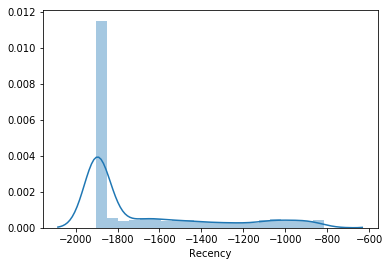

In [274]:
print(rfmModel.Recency.describe())
x = rfmModel['Recency']
distplot = sns.distplot(x)

In [275]:
quantiles = rfmModel.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles = quantiles.to_dict() #Convert the dataframe into a nested dictionary of quantiles
print(quantiles)

{'Recency': {0.2: -1901.0, 0.4: -1901.0, 0.6: -1845.0, 0.8: -1383.0}, 'Frequency': {0.2: 73.0, 0.4: 223.0, 0.6: 403.0, 0.8: 655.0}, 'Monetary': {0.2: 722.3, 0.4: 2243.0, 0.6: 4003.8, 0.8: 6508.1}}


In [277]:
def RScores(x,p,d):   #Functions to get the RFM scores. For R scores, the smaller the number the higher the rank (most recent)
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
    
def FMScores(x,p,d):     #Function to get F and M scores. For F and M, the higher the rank, the more frequent and the more money
    if x <= d[p][0.2]:   #has been spent from the customer
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [281]:
rfmModel['R'] = rfmModel['Recency'].apply(RScores,args=('Recency',quantiles))
rfmModel['F'] = rfmModel['Frequency'].apply(FMScores,args=('Frequency',quantiles))
rfmModel['M'] = rfmModel['Monetary'].apply(FMScores,args=('Monetary',quantiles))
rfmModel['RFM'] = rfmModel.R.map(str) + rfmModel.F.map(str) + rfmModel.M.map(str)
rfmModel.head()


,ID,Recency,Frequency,Monetary,R,F,M,RFM
0,Panel 101011101,-1887,404,3902.2,3,4,3,343
1,Panel 101016101,-1894,326,1888.2,3,3,2,332
2,Panel 101019101,-1901,1730,7333.3,5,5,5,555
3,Panel 101024101,-1901,1004,5990.7,5,5,4,554
4,Panel 105009103,-1901,1273,4749.1,5,5,4,554


In [291]:
rfmModel.sort_values("RFM", ascending = False)
rfmModel.loc[0: 650, :]

,ID,Recency,Frequency,Monetary,R,F,M,RFM
0,Panel 101011101,-1887,404,3902.2,3,4,3,343
1,Panel 101016101,-1894,326,1888.2,3,3,2,332
2,Panel 101019101,-1901,1730,7333.3,5,5,5,555
3,Panel 101024101,-1901,1004,5990.7,5,5,4,554
4,Panel 105009103,-1901,1273,4749.1,5,5,4,554
5,Panel 105015101,-1222,204,1995.1,1,2,2,122
6,Panel 105017101,-1901,431,1434.8,5,4,2,542
7,Panel 105021106,-1901,1020,9627.6,5,5,5,555
8,Panel 105027101,-1873,884,5823.8,3,5,4,354
9,Panel 105031104,-1901,580,5683.4,5,4,4,544


In [ ]:
#End of RFM Model

In [253]:
HD.groupby(["Panel ID", "year"])["Spend"].sum()
data17 = HD[HD["year"] == 2017]
data18 = HD[HD["year"] == 2018]
data19 = HD[HD["year"] == 2019]
data20 = HD[HD["year"] == 2020]

In [264]:
Series17 = data17.groupby(["Panel ID"])["Spend"].sum().sort_values(ascending = False)
data17 = pd.DataFrame(Series17)
data17["ID"] = data17.index
data17

,Spend,ID
Panel ID,,
Panel 133006101,7142.9,Panel 133006101
Panel 442056101,6719.7,Panel 442056101
Panel 800441201,5461.0,Panel 800441201
Panel 442058101,4981.0,Panel 442058101
Panel 800214401,4365.9,Panel 800214401
Panel 122008101,4226.9,Panel 122008101
Panel 800135301,4202.2,Panel 800135301
Panel 800305301,4183.0,Panel 800305301
Panel 800153801,4087.4,Panel 800153801


In [259]:
Series18 = data18.groupby(["Panel ID"])["Spend"].sum().sort_values(ascending = False)
data18 = pd.DataFrame(Series18)
data18["ID"] = data18.index
data18

,Spend,ID
Panel ID,,
Panel 133006101,15300.4,Panel 133006101
Panel 800619001,12112.0,Panel 800619001
Panel 442056101,11030.0,Panel 442056101
Panel 137027101,10599.1,Panel 137027101
Panel 442058101,9958.4,Panel 442058101
Panel 212065101,8644.3,Panel 212065101
Panel 245191101,8120.7,Panel 245191101
Panel 800441201,7376.7,Panel 800441201
Panel 202112101,7367.1,Panel 202112101


In [260]:
Series19 = data19.groupby(["Panel ID"])["Spend"].sum().sort_values(ascending = False)
data19 = pd.DataFrame(Series19)
data19["ID"] = data19.index
data19

,Spend,ID
Panel ID,,
Panel 800619001,15677.3,Panel 800619001
Panel 133006101,14869.1,Panel 133006101
Panel 442056101,11036.4,Panel 442056101
Panel 801042601,9757.1,Panel 801042601
Panel 316040101,9106.2,Panel 316040101
Panel 442058101,8174.5,Panel 442058101
Panel 801448101,8065.3,Panel 801448101
Panel 137027101,8020.4,Panel 137027101
Panel 122008104,7836.3,Panel 122008104


In [261]:
Series20 = data20.groupby(["Panel ID"])["Spend"].sum().sort_values(ascending = False)
data20 = pd.DataFrame(Series20)
data20["ID"] = data20.index
data20

,Spend,ID
Panel ID,,
Panel 133006101,8323.1,Panel 133006101
Panel 800619001,5931.5,Panel 800619001
Panel 801822301,5743.0,Panel 801822301
Panel 801626601,4739.0,Panel 801626601
Panel 801069201,4568.4,Panel 801069201
Panel 801812701,4470.1,Panel 801812701
Panel 316040101,4427.2,Panel 316040101
Panel 442056101,4373.9,Panel 442056101
Panel 202112101,4262.2,Panel 202112101


In [133]:
print (HPD.head)
print(HPD.shape)
HPD.columns

<bound method NDFrame.head of                    ID            BMI              Income         Ethnicity  \
0     Panel 101011101          Obese  Income 1500 - 1999       North Malay   
1     Panel 101016101        Healthy  Income 1500 - 1999       North Malay   
2     Panel 101019101          Obese       Income < 1500       North Malay   
3     Panel 101024101    Over Weight  Income 1500 - 1999     North Chinese   
4     Panel 105009103    Over Weight       Income < 1500       North Malay   
5     Panel 105015101        Healthy  Income 2000 - 2999       North Malay   
6     Panel 105017101          Obese       Income < 1500       North Malay   
7     Panel 105021106          Obese  Income 4000 - 4999       North Malay   
8     Panel 105027101        Healthy       Income < 1500       North Malay   
9     Panel 105031104    Over Weight       Income < 1500       North Malay   
10    Panel 105039101          Obese  Income 2000 - 2999       North Malay   
11    Panel 105043101    Over Weig

Index(['ID', 'BMI', 'Income', 'Ethnicity', 'Lifestage', 'Strata', '#HH',
       'location'],
      dtype='object')

In [284]:
V_data = pd.DataFrame(HD.groupby("Category")["Volume"].sum())
V_data["Rank"] = V_data.rank(ascending = False)
V_data.sort_values(by = "Rank")

,Volume,Rank
Category,,
Eggs,2129708.0,1.0
Rice,587798.2,2.0
Instant Noodles,358091.8,3.0
Cooking Oils,189616.6,4.0
Sugar,136678.9,5.0
Condensed/Evap Milk,79274.5,6.0
Drinking Water,69156.1,7.0
Flour,63267.9,8.0
Liquid Milk,53158.7,9.0


In [51]:
S_data = pd.DataFrame(HD.groupby("Category")["Spend"].sum())

In [53]:
S_data["Rank"] = S_data.rank(ascending = False)

<Container object of 62 artists>

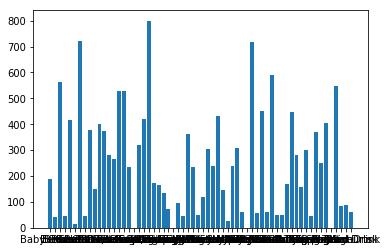

In [164]:
S_data.sort_values(by = "Rank")
S_data["Category"] = S_data.index
data0 = pd.merge(S_data, HCI, on = "Category")
data0 = data0.sort_values("Rank")
plt.bar(data0["Category"], data0["Calories/100g"])

In [135]:
ID_data = pd.DataFrame(HD.groupby("Panel ID")["Spend"].sum())
ID_data["Rank"] = ID_data.rank(ascending = False)
ID_data.sort_values(by = "Rank")
ID_data[ID_data["Rank"] <= 650] #top 20% of the customers in terms of spending
ID_data["ID"] = ID_data.index
ID_data

,Spend,Rank,ID
Panel ID,,,
Panel 101011101,3902.2,1326.0,Panel 101011101
Panel 101016101,1888.2,2083.0,Panel 101016101
Panel 101019101,7333.3,495.0,Panel 101019101
Panel 101024101,5990.7,736.0,Panel 101024101
Panel 105009103,4749.1,1064.0,Panel 105009103
Panel 105015101,1995.1,2044.0,Panel 105015101
Panel 105017101,1434.8,2281.0,Panel 105017101
Panel 105021106,9627.6,231.0,Panel 105021106
Panel 105027101,5823.8,777.0,Panel 105027101


In [136]:
Data1 = pd.merge(HPD, ID_data, on = "ID")
Data1.sort_values("Rank")
Data1


,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location,Spend,Rank
0,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,3902.2,1326.0
1,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North,1888.2,2083.0
2,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North,7333.3,495.0
3,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North,5990.7,736.0
4,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North,4749.1,1064.0
5,Panel 105015101,Healthy,Income 2000 - 2999,North Malay,Teens and Toddlers,Rural,7+ Member HH,North,1995.1,2044.0
6,Panel 105017101,Obese,Income < 1500,North Malay,Matured Families,Rural,1-3 Member HH,North,1434.8,2281.0
7,Panel 105021106,Obese,Income 4000 - 4999,North Malay,Matured Families,Rural,4 Member HH,North,9627.6,231.0
8,Panel 105027101,Healthy,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North,5823.8,777.0
9,Panel 105031104,Over Weight,Income < 1500,North Malay,Teens and Toddlers,Rural,5 Member HH,North,5683.4,812.0


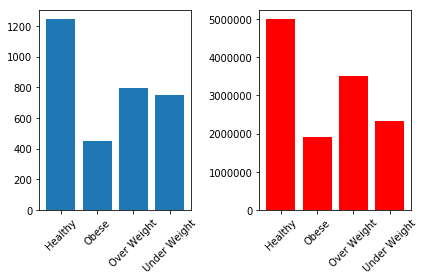

In [181]:
ls = ["Healthy" ,"Obese", "Over Weight", "Under Weight"]
ls1 = Data1.groupby("BMI")['BMI'].count()
ls2 = Data1.groupby("BMI")["Spend"].sum()

plt.subplot(1, 2, 1)
plt.bar(ls, ls1, tick_label = ls, width = 0.8)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(ls,ls2, tick_label = ls, width = 0.8, color = "Red")
plt.xticks(rotation=45)
plt.tight_layout()


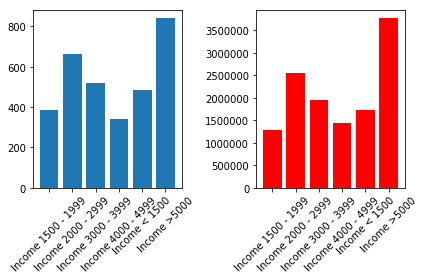

In [178]:
pd.unique(Data1["Income"])
ls1 = Data1.groupby("Income")['Income'].count()
ls2 = Data1.groupby("Income")["Spend"].sum()
ls = ['Income 1500 - 1999', 'Income 2000 - 2999', 'Income 3000 - 3999',
      'Income 4000 - 4999', 'Income < 1500', 'Income >5000']

plt.subplot(1, 2, 1)
plt.bar(ls, ls1, tick_label = ls, width = 0.8)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(ls,ls2, tick_label = ls, width = 0.8, color = "Red")
plt.xticks(rotation=45)
plt.tight_layout()


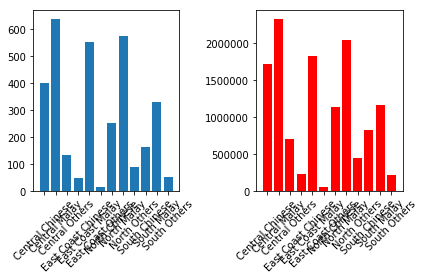

In [194]:
pd.unique(Data1["Ethnicity"])
ls1 = Data1.groupby("Ethnicity")['Ethnicity'].count()
ls2 = Data1.groupby("Ethnicity")["Spend"].sum()#Malay big customer??

ls = ["Central Chinese", "Central Malay", "Central Others", "East Coast Chinese", "East Coast Malay", "East Coast Others", 
      "North Chinese", "North Malay", "North Others", "South Chinese", "South Malay", "South Others"]

plt.subplot(1, 2, 1)
plt.bar(ls, ls1, tick_label = ls, width = 0.8)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(ls,ls2, tick_label = ls, width = 0.8, color = "Red")
plt.xticks(rotation=45)
plt.tight_layout()



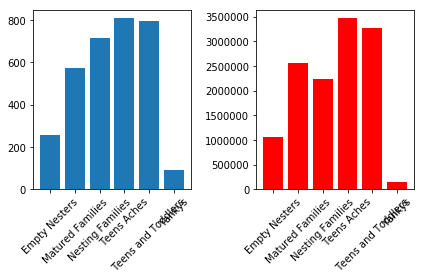

In [195]:
pd.unique(Data1["Lifestage"])

ls = ["Empty Nesters", "Matured Families", "Nesting Families", "Teens Aches", "Teens and Toddlers", "Yankys"]
ls1 = Data1.groupby("Lifestage")['Lifestage'].count()
ls2 = Data1.groupby("Lifestage")["Spend"].sum()

plt.subplot(1, 2, 1)
plt.bar(ls, ls1, tick_label = ls, width = 0.8)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(ls,ls2, tick_label = ls, width = 0.8, color = "Red")
plt.xticks(rotation=45)
plt.tight_layout()

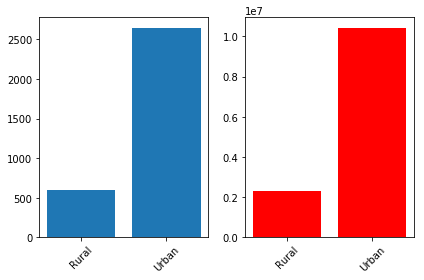

In [196]:
pd.unique(Data1["Strata"])

ls = ["Rural", "Urban"]
ls1 = Data1.groupby("Strata")['Strata'].count()
ls2 = Data1.groupby("Strata")["Spend"].sum()

plt.subplot(1, 2, 1)
plt.bar(ls, ls1, tick_label = ls, width = 0.8)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(ls,ls2, tick_label = ls, width = 0.8, color = "Red")
plt.xticks(rotation=45)
plt.tight_layout()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

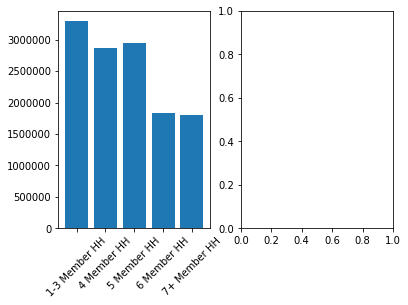

In [199]:
pd.unique(Data1["#HH"])

ls = ['1-3 Member HH', '4 Member HH', '5 Member HH', '6 Member HH', '7+ Member HH' ]
ls1 = Data1.groupby("#HH")['#HH'].count()
ls1 = Data1.groupby("#HH")["Spend"].sum()

plt.subplot(1, 2, 1)
plt.bar(ls, ls1, tick_label = ls, width = 0.8)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(ls,ls2, tick_label = ls, width = 0.8, color = "Red")
plt.xticks(rotation=45)


In [146]:
pd.unique(Data1["location"])
Data1.groupby("location")['location'].count()
Data1.groupby("location")["Spend"].sum()

location
Central       4759888.6
East Coast    2118962.4
North         3640316.3
South         2213550.7
Name: Spend, dtype: float64